<a href="https://colab.research.google.com/github/BramanTyamahedrawan/Machine-Learning-SMT-5/blob/main/UTS/UTS_Kelompok_ML_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS MACHINE LEARNING**

# **KELOMPOK 2**

1. **Braman Tyamahendrawan (04)**
2. **Dimas Putra Anhar W.A. (05)**
3. **Fikril Hadad Ramadhani (07)**
4. **Muhammad Maulana Givari (18)**
5. **Muhammad Sabilar Rosyad (19)**
6. **Satria Yudhistira Yudha P. (26)**

In [129]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **K-MEANS**

In [130]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os

## 1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan

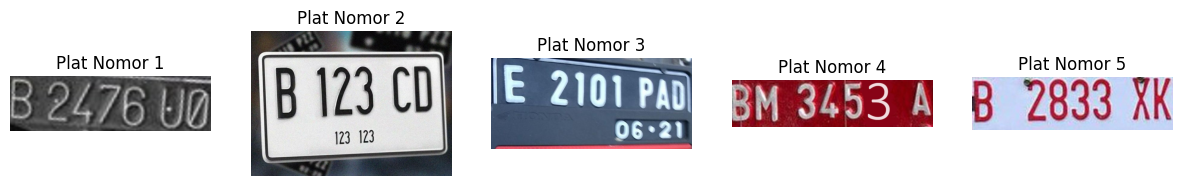

In [131]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    return image

def display_images_side_by_side(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

image_paths = [
    '/content/drive/MyDrive/ML/UTS/plat_1.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_2.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_3.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_4.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_5.jpg'
]

titles = [f'Plat Nomor {i+1}' for i in range(len(image_paths))]
images = [preprocess_image(path) for path in image_paths]
display_images_side_by_side(images, titles)

## 2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.

In [132]:
def kmeans_segmentation(image, k=2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].reshape((height, width, channels)).astype(np.uint8)
    return segmented_pixels

## 3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya

In [148]:
images = [preprocess_image(path) for path in image_paths]
k = 2  # Klustering
segmented_images = [kmeans_segmentation(image, k) for image in images]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

## 4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,

### a. Merubah color space

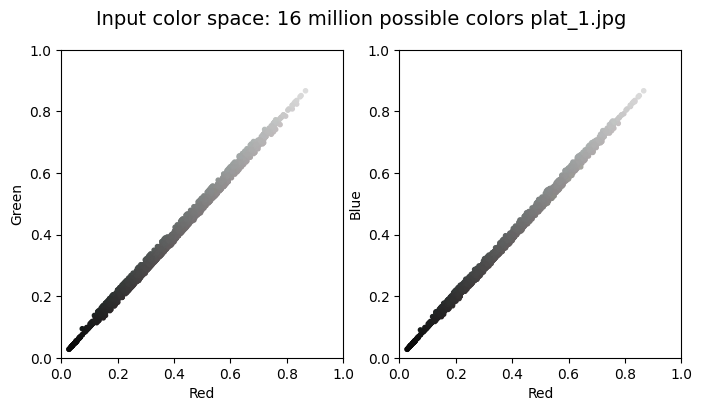

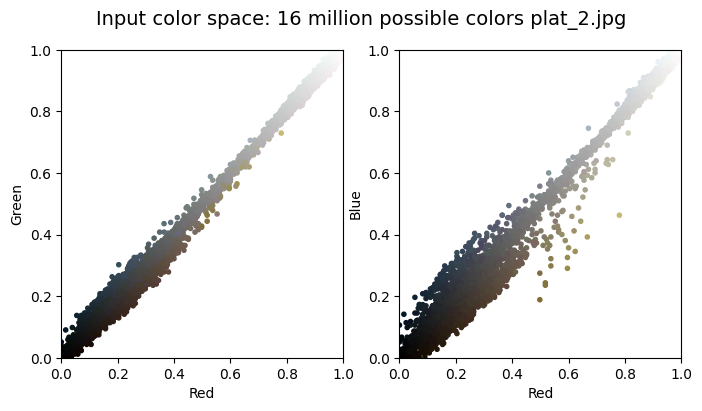

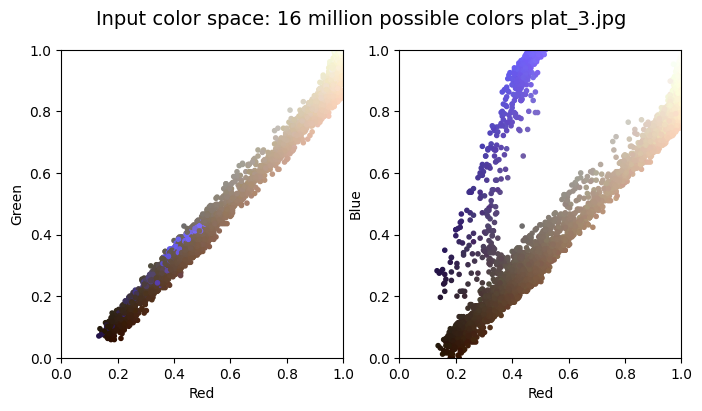

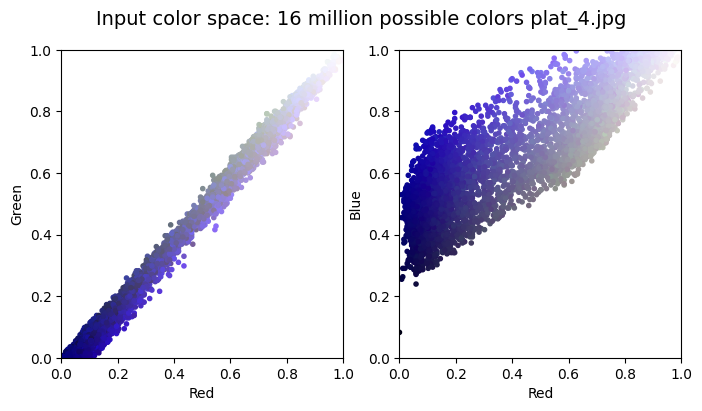

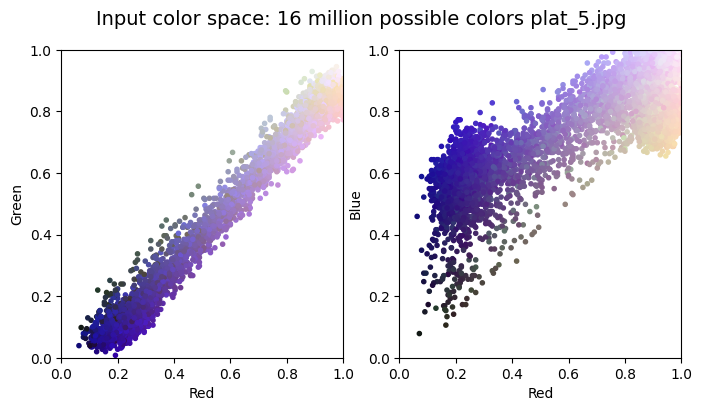

In [134]:
def plot_image_and_color_space(image_path):
    img = cv2.imread(image_path)
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)

    def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
            colors = data

        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))

        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

        fig.suptitle(title, size=14)

    image_name = os.path.basename(image_path)
    plot_pixels(data, title=f'Input color space: 16 million possible colors {image_name}')
    plt.show()

for path in image_paths:
    plot_image_and_color_space(path)


### b. Reduksi dimensi

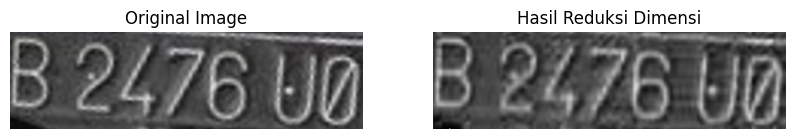

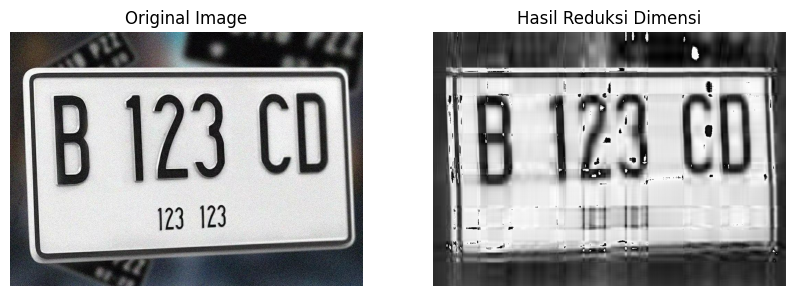

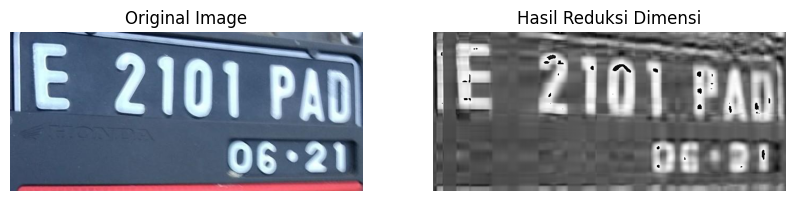

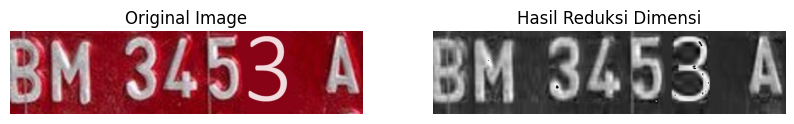

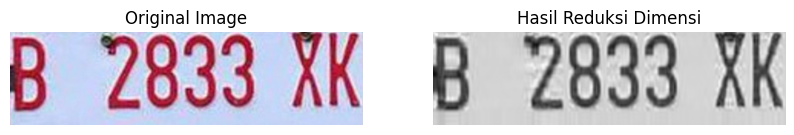

In [135]:
def reduce_dimension_and_display(image_path, n_components=10):
    # Baca gambar asli menggunakan OpenCV
    original_image = cv2.imread(image_path)

    # Periksa apakah gambar berhasil dimuat
    if original_image is not None:
        # Konversi gambar ke Grayscale
        grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Buat objek PCA dengan jumlah komponen yang diinginkan
        pca = PCA(n_components=n_components)

        # Terapkan PCA ke data gambar
        reduced_image = pca.fit_transform(grayscale_image)

        # Kembalikan data ke bentuk asli
        reconstructed_image = pca.inverse_transform(reduced_image)

        # Ubah kembali ke bentuk gambar
        reco_image = reconstructed_image.astype(np.uint8)

        # Tampilkan gambar asli dengan matplotlib
        plt.figure(figsize=(10, 5))  # Ganti ukuran sesuai keinginan
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')

        # Tampilkan gambar yang telah di-reduksi dimensinya dengan matplotlib
        plt.subplot(122)
        plt.imshow(cv2.cvtColor(reco_image, cv2.COLOR_GRAY2RGB))
        plt.title("Hasil Reduksi Dimensi")
        plt.axis('off')
        plt.show()
    else:
        print(f"Fail to read Picture: {image_path}.")

n_components = 10  # 50 komponen

for path in image_paths:
    reduce_dimension_and_display(path, n_components)


## 5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

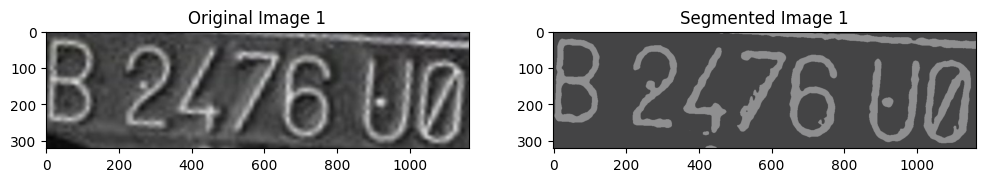

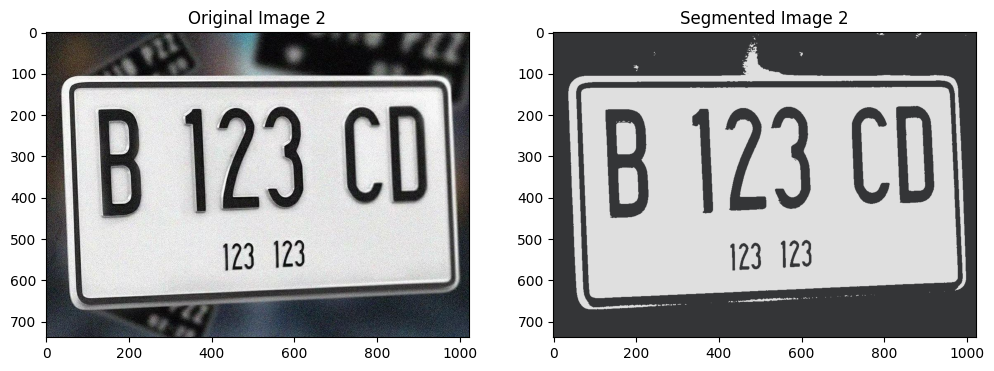

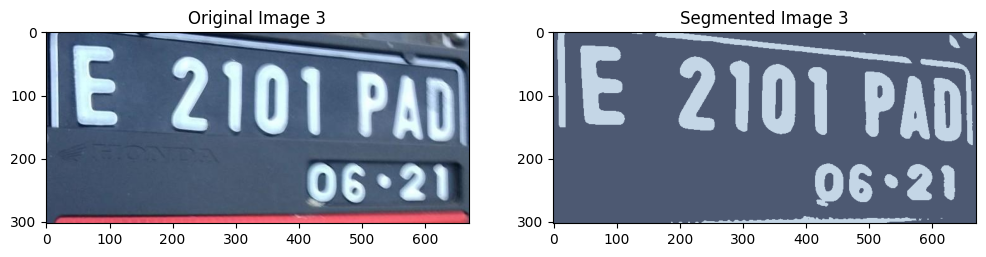

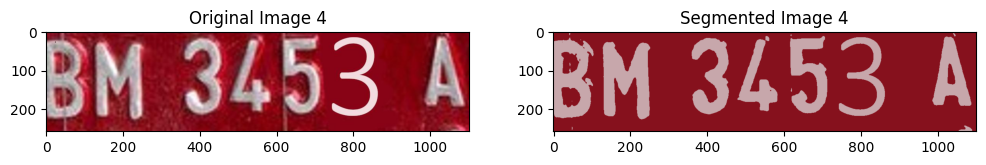

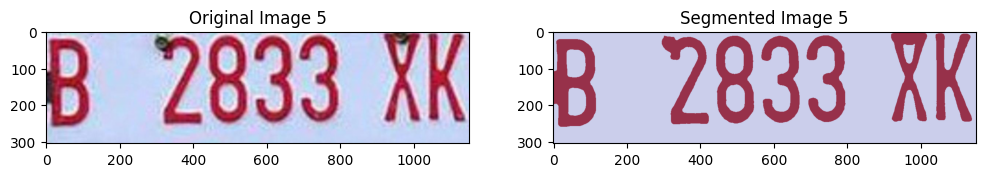

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred

def kmeans_segmentation(image, k=2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].reshape((height, width, channels)).astype(np.uint8)
    return segmented_pixels

def display_images(original_image, segmented_image, title1, title2):
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title(title2)
    plt.show()

images = [preprocess_image(path) for path in image_paths]
k = 2  # Klustering
segmented_images = [kmeans_segmentation(image, k) for _, image in images]

for i in range(len(image_paths)):
    display_images(images[i][0], segmented_images[i], f'Original Image {i+1}', f'Segmented Image {i+1}')

# **Mean Shift Clustering (MSC)**

In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import os

## 1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan

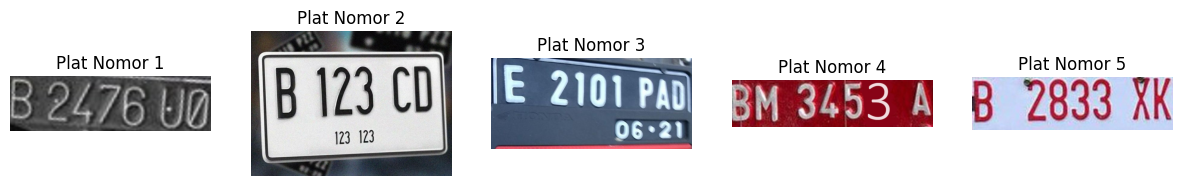

In [143]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)

    if image is not None:
        # Konversi gambar ke tipe data uint8 (8-bit per channel) dan pastikan bahwa itu adalah larik NumPy.
        if image.dtype != np.uint8:
            image = image.astype(np.uint8)

        return image
    else:
        return None  # Handle jika gambar tidak dapat dibaca

def display_images_side_by_side(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

image_paths = [
    '/content/drive/MyDrive/ML/UTS/plat_1.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_2.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_3.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_4.jpg',
    '/content/drive/MyDrive/ML/UTS/plat_5.jpg'
]

titles = [f'Plat Nomor {i+1}' for i in range(len(image_paths))]
images = [preprocess_image(path) for path in image_paths if preprocess_image(path) is not None]
display_images_side_by_side(images, titles)


## 2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.

In [146]:
def mean_shift_segmentation(image, k=2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)

    # Estimasi bandwidth terlebih dahulu
    bandwidth = estimate_bandwidth(pixels, quantile=0.2, n_samples=500)

    # Inisialisasi Mean-Shift dengan bandwidth yang telah diestimasi
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

    # Melakukan clustering
    ms.fit(pixels)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    # Menghasilkan gambar hasil segmentasi
    segmented_pixels = cluster_centers[labels].reshape((height, width, channels)).astype(np.uint8)

    return segmented_pixels

## 3. Anda dapat menggunakan algortima klasterisasi yang lain

In [147]:
# Melakukan Mean-Shift Clustering pada gambar yang sudah diproses
k = 2
segmented_images = [mean_shift_segmentation(image) for image in images]

## 4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,

### a. Merubah color space

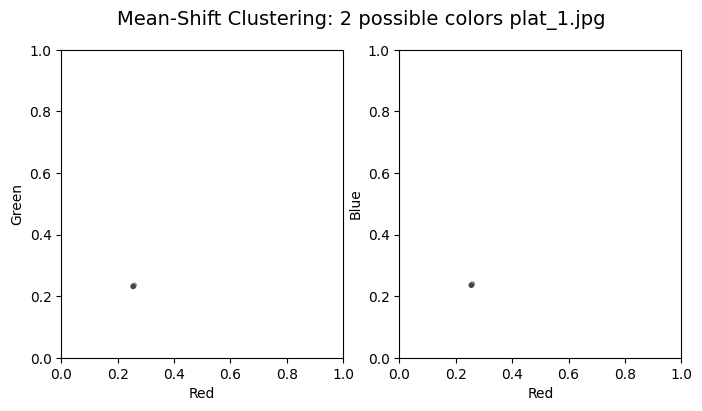

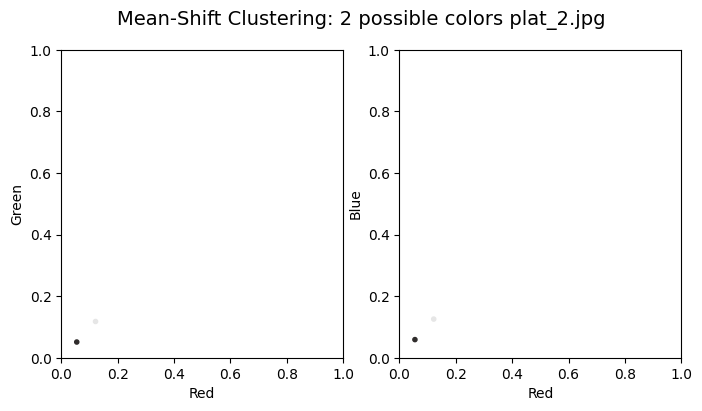

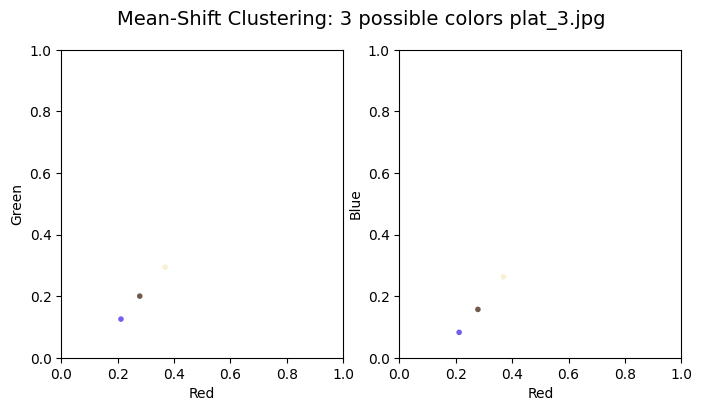

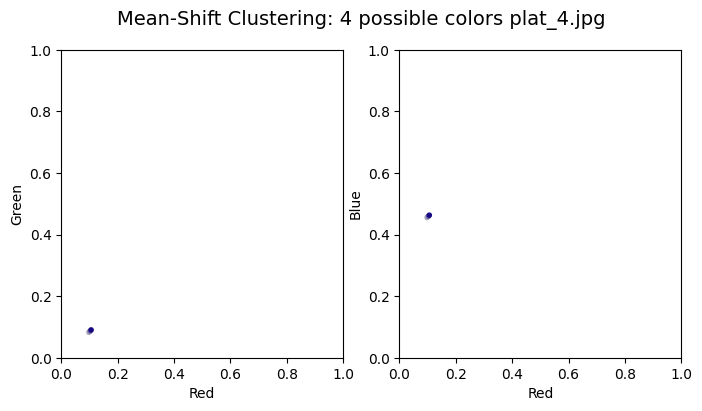

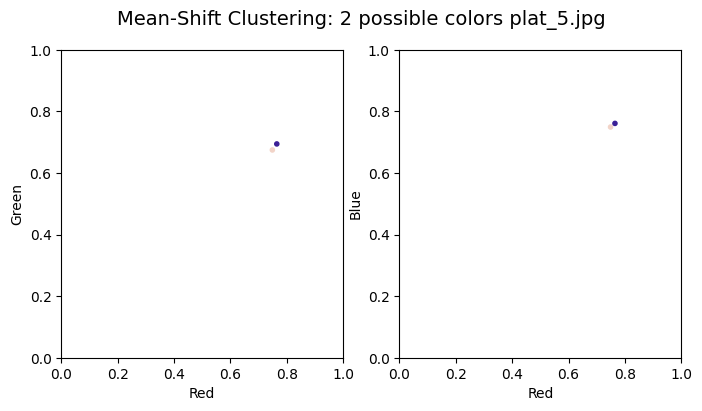

In [ ]:
def plot_image_and_color_space(image_path):
    img = cv2.imread(image_path)
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)

    def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
            colors = data

        rng = np.random.RandomState(0)

        # Batasi N hingga jumlah cluster yang dihasilkan oleh Mean-Shift
        unique_colors = np.unique(colors, axis=0)
        N = min(N, len(unique_colors))

        i = rng.permutation(unique_colors.shape[0])[:N]
        selected_colors = unique_colors[i]
        indices = np.where(np.isin(colors, selected_colors).all(axis=1))

        R, G, B = data[indices].T

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))

        ax[0].scatter(R, G, color=selected_colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

        ax[1].scatter(R, B, color=selected_colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

        fig.suptitle(title, size=14)

    # Melakukan Mean-Shift Clustering pada data warna
    bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=1000)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_

    # Warna pusat cluster
    cluster_centers = ms.cluster_centers_
    colors = cluster_centers

    # Menampilkan hasil clustering
    image_name = os.path.basename(image_path)
    plot_pixels(data, title=f'Mean-Shift Clustering: {len(colors)} possible colors {image_name}', colors=colors)

    plt.show()

for path in image_paths:
    plot_image_and_color_space(path)


### b. Reduksi dimensi

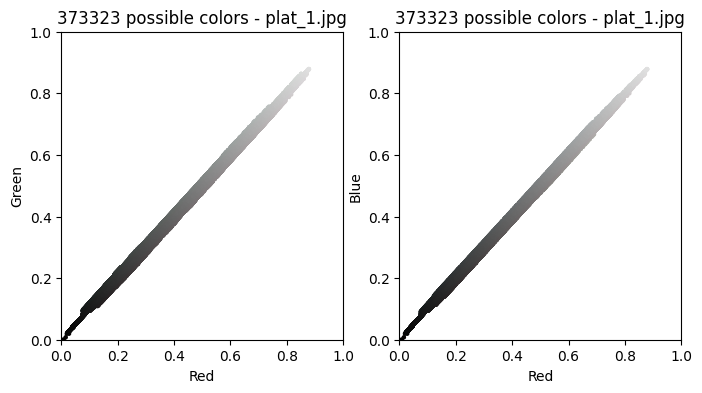

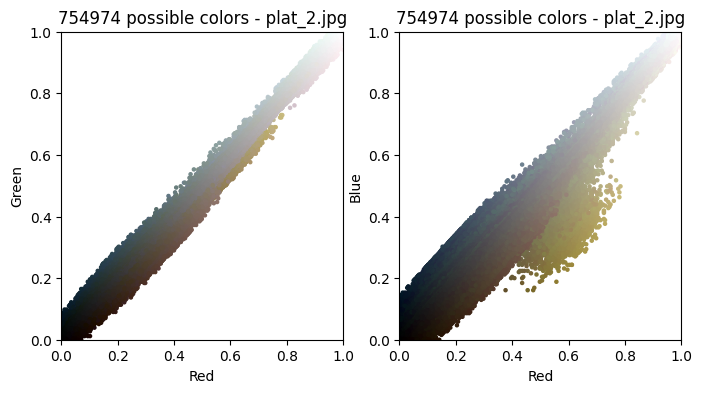

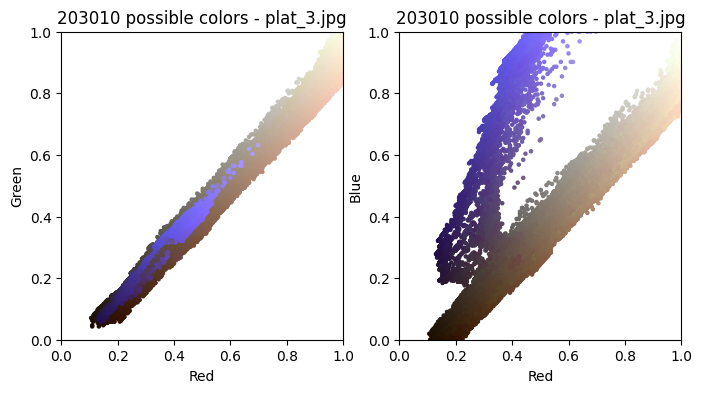

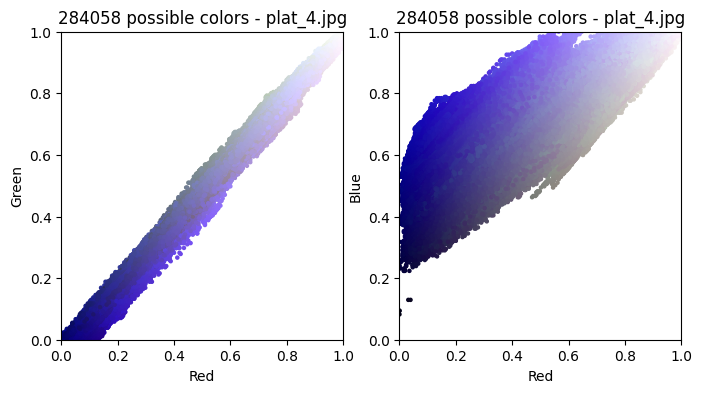

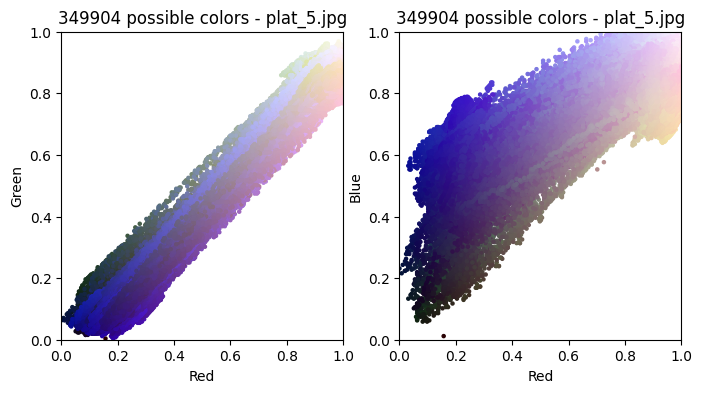

In [ ]:
def plot_image_and_color_space(image_path):
    img = cv2.imread(image_path)
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)

    image_name = os.path.basename(image_path)

    def plot_color_space(title):
        fig, ax = plt.subplots(1, 2, figsize=(8, 4))

        ax[0].scatter(data[:, 0], data[:, 1], c=data, s=5)
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[0].set_title(f'{title} - {image_name}')

        ax[1].scatter(data[:, 0], data[:, 2], c=data, s=5)
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        ax[1].set_title(f'{title} - {image_name}')

        plt.show()

    plot_color_space(f'{h * w} possible colors')

for path in image_paths:
    plot_image_and_color_space(path)


## 5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

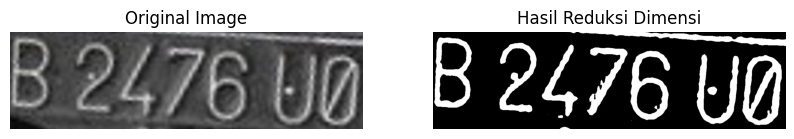

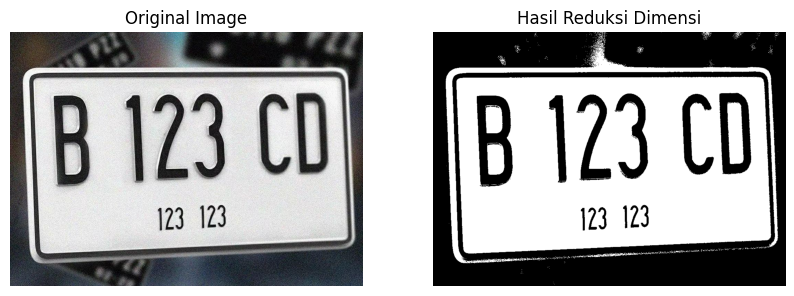

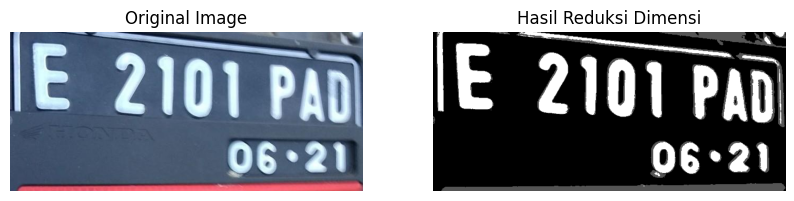

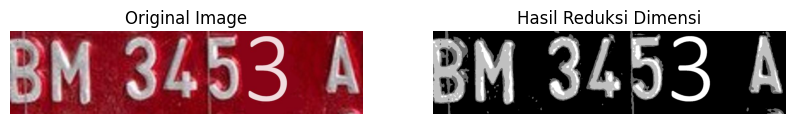

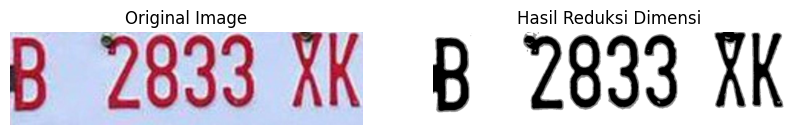

In [ ]:
def reduce_dimension_and_display(image_path, quantile=0.2):
    # Baca gambar asli menggunakan OpenCV
    original_image = cv2.imread(image_path)

    # Periksa apakah gambar berhasil dimuat
    if original_image is not None:
        # Konversi gambar ke Grayscale
        grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Ubah gambar menjadi larik 1D
        data = grayscale_image.reshape(-1, 1)

        # Estimasi bandwidth (lebar) untuk Mean Shift Clustering
        bandwidth = estimate_bandwidth(data, quantile=quantile, n_samples=1000)

        # Inisialisasi model Mean Shift dengan bandwidth yang diestimasi
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

        # Melakukan clustering dengan Mean Shift
        ms.fit(data)

        # Mendapatkan label-cluster untuk setiap titik data
        labels = ms.labels_

        # Mendapatkan pusat-pusat cluster
        cluster_centers = ms.cluster_centers_

        # Ubah data menjadi gambar hasil reduksi
        reduced_image = cluster_centers[labels].reshape(grayscale_image.shape).astype(np.uint8)

        # Tampilkan gambar asli dengan matplotlib
        plt.figure(figsize=(10, 5))  # Ganti ukuran sesuai keinginan
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')

        # Tampilkan gambar yang telah di-reduksi dimensinya dengan matplotlib
        plt.subplot(122)
        plt.imshow(reduced_image, cmap='gray')
        plt.title("Hasil Reduksi Dimensi")
        plt.axis('off')
        plt.show()
    else:
        print(f"Fail to read Picture: {image_path}.")

quantile = 0.2

for path in image_paths:
    reduce_dimension_and_display(path, quantile)


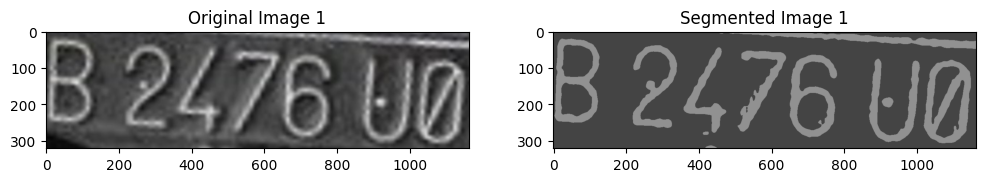

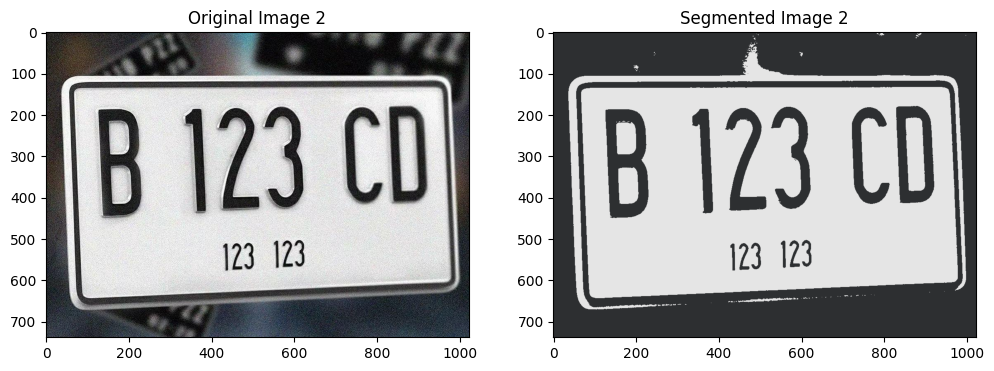

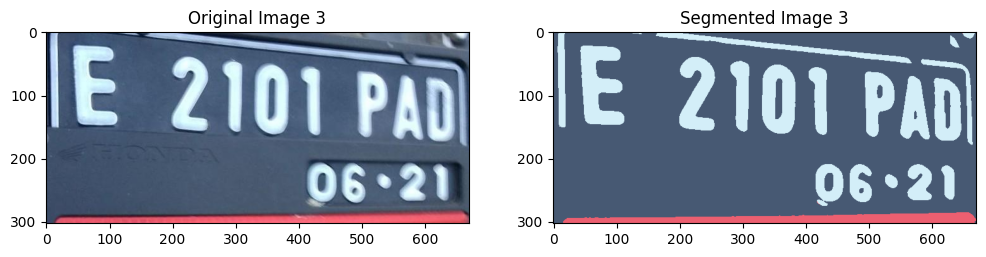

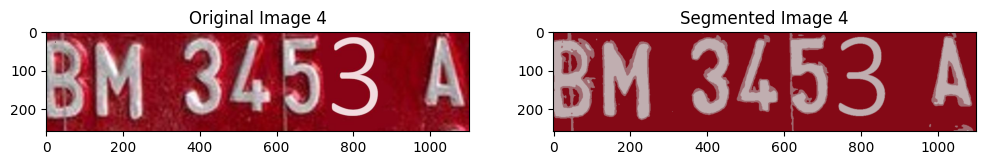

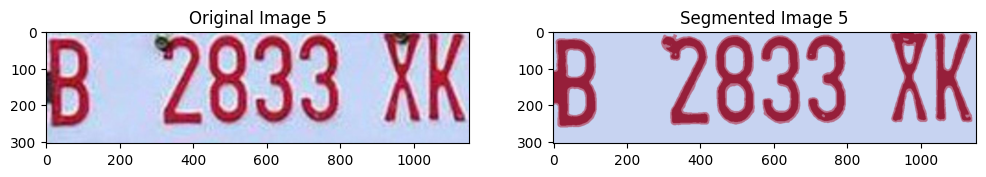

In [140]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred

def mean_shift_segmentation(image, quantile=0.2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)

    # Estimasi bandwidth (lebar) untuk Mean Shift Clustering
    bandwidth = estimate_bandwidth(pixels, quantile=quantile, n_samples=1000)

    # Inisialisasi model Mean Shift dengan bandwidth yang diestimasi
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(pixels)

    # Mendapatkan label-cluster untuk setiap titik data
    labels = ms.labels_

    # Mendapatkan pusat-pusat cluster
    cluster_centers = ms.cluster_centers_

    # Ubah data menjadi gambar hasil segmentasi
    segmented_pixels = cluster_centers[labels].reshape((height, width, channels)).astype(np.uint8)
    return segmented_pixels

def display_images(original_image, segmented_image, title1, title2):
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title(title2)
    plt.show()

quantile = 0.2

images = [preprocess_image(path) for path in image_paths]
segmented_images = [mean_shift_segmentation(image, quantile) for _, image in images]

for i in range(len(image_paths)):
    display_images(images[i][0], segmented_images[i], f'Original Image {i+1}', f'Segmented Image {i+1}')
